## Graduate Admission
Attribute info:
1. Serial No.
2. GRE Score ( out of 340 )
3. TOEFL Score ( out of 120 )
4. University Rating ( out of 5 )
5. SOP ( out of 5 )
6. LOR ( out of 5 )
7. CGPA ( out of 10 )
8. Research (1 - Has Research Experience, 0 - No Research Experience)
9. Chance of Admit ( ranging from 0 to 1 )

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score,recall_score,precision_score,mean_absolute_error,mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler,LabelEncoder, MinMaxScaler
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')
%matplotlib inline

In [2]:
df = pd.read_csv('Admission_Predict_Ver1.1.csv')
df.drop('Serial No.',axis=1,inplace = True)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
GRE Score            500 non-null int64
TOEFL Score          500 non-null int64
University Rating    500 non-null int64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(4), int64(4)
memory usage: 31.3 KB


### EDA

In [4]:
#Minimum GRE Score
print('The minimum GRE Score is:',round(df['GRE Score'].min(),2))
#Maximum GRE Score
print('The maximum GRE Score is:',round(df['GRE Score'].max(),2))
#Average GRE Score
print('The average GRE Score is:',round(df['GRE Score'].mean(),2),'\n')

#Minimum TOEFL Score
print('The minimum TOEFL Score is:',round(df['TOEFL Score'].min(),2))
#Maximum TOEFL Score
print('The maximum TOEFL Score is:',round(df['TOEFL Score'].max(),2))
#Average TOEFL Score
print('The average TOEFL Score is:',round(df['TOEFL Score'].mean(),2),'\n')

#Minimum SOP
print('The minimum SOP is:',round(df['SOP'].min(),2))
#Maximum SOP
print('The maximum SOP is:',round(df['SOP'].max(),2))
#Average SOP
print('The average SOP is:',round(df['SOP'].mean(),2),'\n')

#Minimum LOR
print('The minimum LOR is:',round(df['LOR'].min(),2))
#Maximum LOR
print('The maximum LOR is:',round(df['LOR'].max(),2))
#Average LOR
print('The average LOR is:',round(df['LOR'].mean(),2),'\n')

#Minimum CGPA
print('The minimum CGPA is:',round(df['CGPA'].min(),2))
#Maximum CGPA
print('The maximum CGPA is:',round(df['CGPA'].max(),2))
#Average CGPA
print('The average CGPA is:',round(df['CGPA'].mean(),2),'\n')

#Minimum University Rating
print('The minimum University Rating is:',df['University Rating'].min())
#Maximum University Rating
print('The maximum University Rating is:',df['University Rating'].max())
#Average University Rating
print('The average University Rating is:',round(df['University Rating'].mean(),2))

The minimum GRE Score is: 290
The maximum GRE Score is: 340
The average GRE Score is: 316.47 

The minimum TOEFL Score is: 92
The maximum TOEFL Score is: 120
The average TOEFL Score is: 107.19 

The minimum SOP is: 1.0
The maximum SOP is: 5.0
The average SOP is: 3.37 

The minimum LOR is: 1.0
The maximum LOR is: 5.0
The average LOR is: 3.48 

The minimum CGPA is: 6.8
The maximum CGPA is: 9.92
The average CGPA is: 8.58 

The minimum University Rating is: 1
The maximum University Rating is: 5
The average University Rating is: 3.11


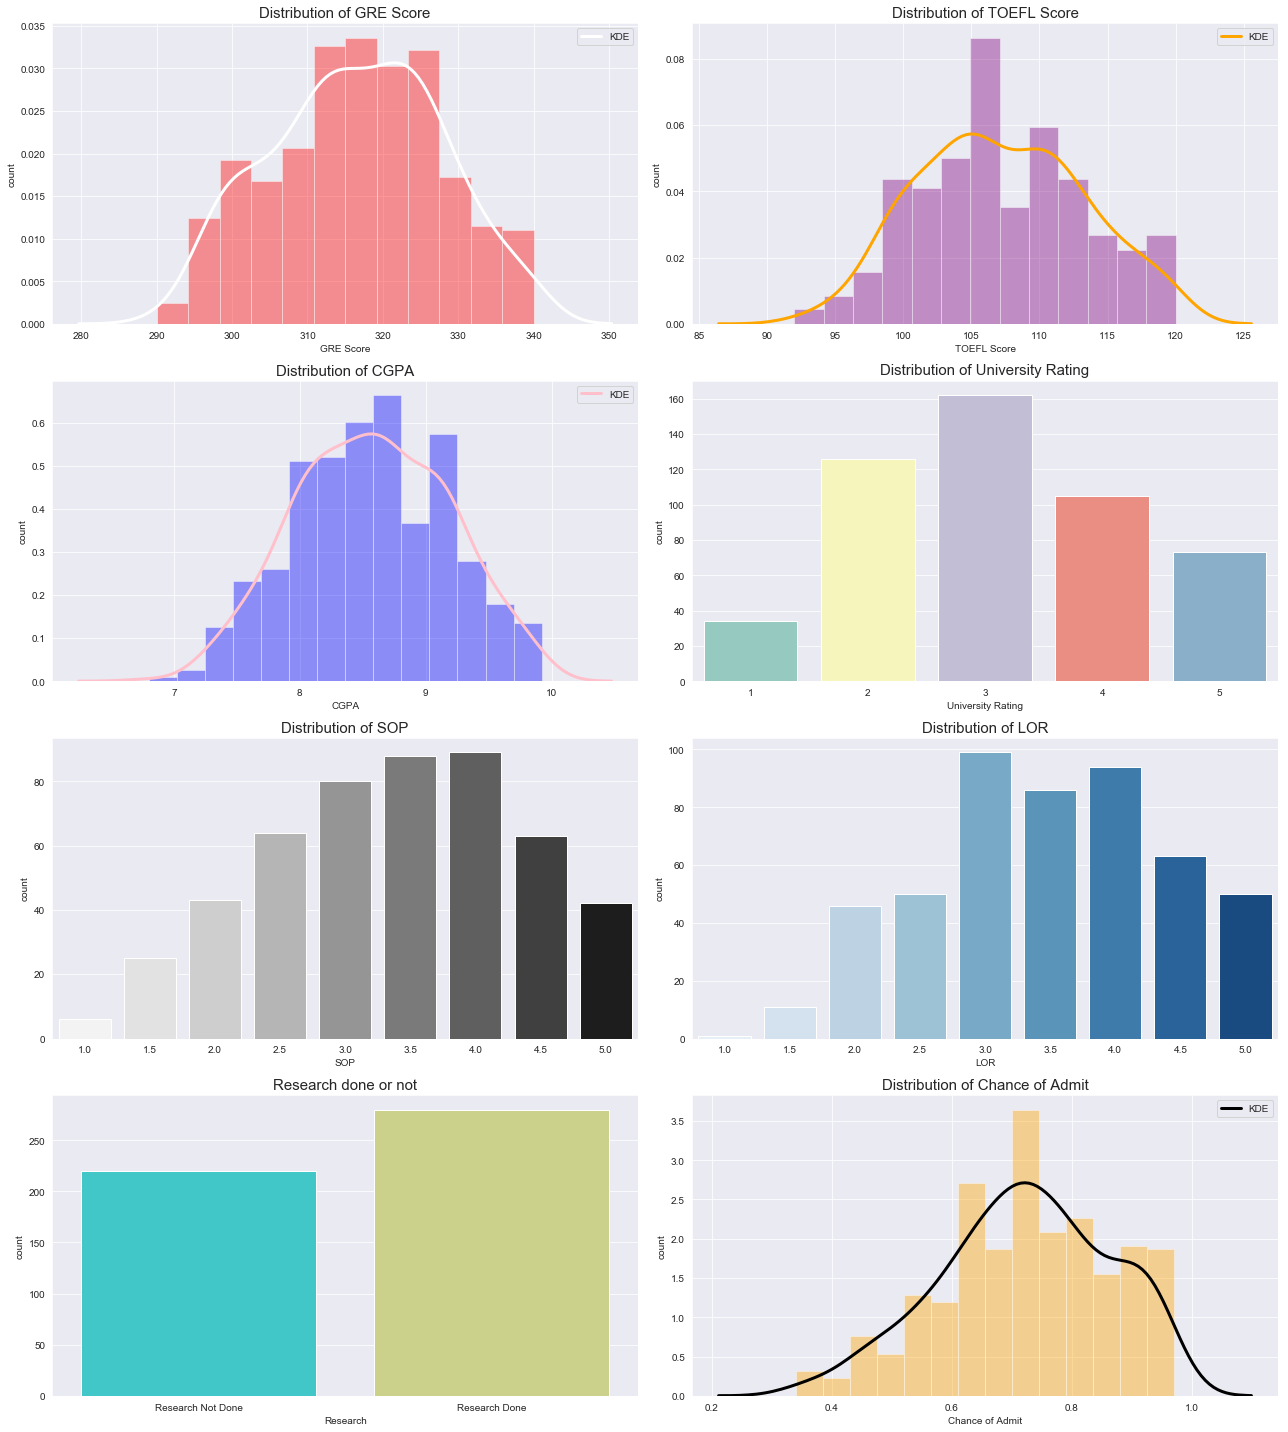

In [5]:
fig,ax = plt.subplots(4,2,figsize=(18,20))

sns.distplot(df['GRE Score'], color = 'red',kde_kws={'color': 'white', 'lw': 3, 'label': 'KDE'}, ax = ax[0,0])
ax[0,0].set_title('Distribution of GRE Score', fontsize = 15)
ax[0,0].set_xlabel('GRE Score')
ax[0,0].set_ylabel('count')

sns.distplot(df['TOEFL Score'], color = 'purple',kde_kws={'color': 'orange', 'lw': 3, 'label': 'KDE'},ax = ax[0,1])
ax[0,1].set_title('Distribution of TOEFL Score', fontsize = 15)
ax[0,1].set_xlabel('TOEFL Score')
ax[0,1].set_ylabel('count')

sns.distplot(df['CGPA'], color = 'blue',kde_kws={'color': 'pink', 'lw': 3, 'label': 'KDE'},ax = ax[1,0])
ax[1,0].set_title('Distribution of CGPA', fontsize = 15)
ax[1,0].set_xlabel('CGPA')
ax[1,0].set_ylabel('count')

sns.countplot(df['University Rating'],palette = 'Set3',ax = ax[1,1])
ax[1,1].set_title('Distribution of University Rating', fontsize = 15)
ax[1,1].set_xlabel('University Rating')
ax[1,1].set_ylabel('count')

sns.countplot(df['SOP'],palette = 'Greys',ax = ax[2,0])
ax[2,0].set_title('Distribution of SOP', fontsize = 15)
ax[2,0].set_xlabel('SOP')
ax[2,0].set_ylabel('count')

sns.countplot(df['LOR'],palette = 'Blues',ax = ax[2,1])
ax[2,1].set_title('Distribution of LOR', fontsize = 15)
ax[2,1].set_xlabel('LOR')
ax[2,1].set_ylabel('count')

fig1 = sns.countplot(df['Research'],palette = 'rainbow',ax = ax[3,0])
fig1.set(xticklabels=["Research Not Done","Research Done"])
ax[3,0].set_title('Research done or not', fontsize = 15)
ax[3,0].set_xlabel('Research')
ax[3,0].set_ylabel('count')

sns.distplot(df['Chance of Admit'], color = 'orange',kde_kws={'color': 'black', 'lw': 3, 'label': 'KDE'}, ax = ax[3,1])
ax[3,1].set_title('Distribution of Chance of Admit', fontsize = 15)
ax[3,1].set_xlabel('Chance of Admit')
ax[3,1].set_ylabel('count')

plt.tight_layout();

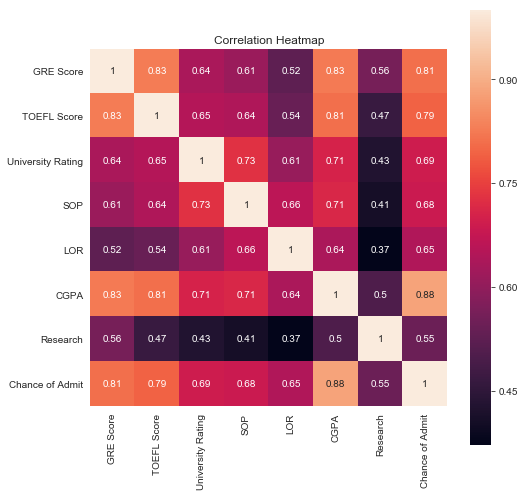

In [6]:
plt.figure(figsize = (8,8))
sns.heatmap(df.corr(),annot = True,square = True)
plt.title('Correlation Heatmap');

The heatmap helps us understand the correlation between different columns of our dataset. For example, the highest correlation between two different columns is 0.88 (CGPA and Chance of Admit, which tells us that CGPA plays a very vital role when it comes to Chance of Admit).

Now to understand how the correlation between different factors and Chance of Admit was achieved

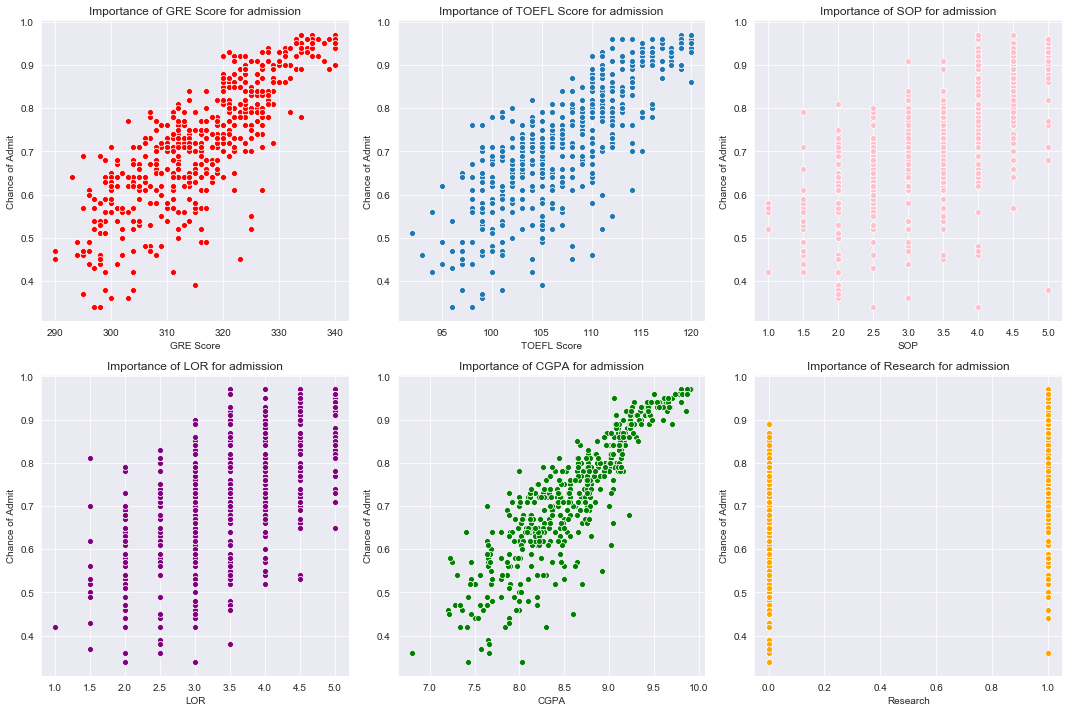

In [7]:
fig,ax = plt.subplots(2,3,figsize=(15,10))

sns.scatterplot(x="GRE Score", y="Chance of Admit", data=df,color = 'red',ax = ax[0,0])
ax[0,0].set_title('Importance of GRE Score for admission', fontsize = 12)

sns.scatterplot(x="TOEFL Score", y="Chance of Admit",data=df,ax = ax[0,1])
ax[0,1].set_title('Importance of TOEFL Score for admission', fontsize = 12)

sns.scatterplot(x="SOP", y="Chance of Admit", data=df,ax = ax[0,2],color = 'pink')
ax[0,2].set_title('Importance of SOP for admission', fontsize = 12)

sns.scatterplot(x="LOR", y="Chance of Admit", data=df,color = 'purple',ax = ax[1,0])
ax[1,0].set_title('Importance of LOR for admission', fontsize = 12)

sns.scatterplot(x="CGPA", y="Chance of Admit",color = 'green' ,data=df,ax = ax[1,1])
ax[1,1].set_title('Importance of CGPA for admission', fontsize = 12)

sns.scatterplot(x="Research", y="Chance of Admit",color = 'orange',data=df,ax = ax[1,2])
ax[1,2].set_title('Importance of Research for admission', fontsize = 12)

plt.tight_layout();

GRE Score and Chance of Admit have high correlation and going back to the heatmap, the correlation is: 0.81

TOEFL Score and Chance of Admit have a slightly lower correlation than GRE Score and Chance of Admit and going back to the heatmap, the correlation is: 0.79

SOP and Chance of Admit have moderate correlation just like LOR and Chance of Admit and going back to the heatmap, the correlation is: 0.68 and 0.65 respectively.

CGPA and Chance of Admit have high correlation whereas Research and Chance of Admit have low correlation and going back to the heatmap, the correlation is: 0.88 and 0.55 respectively.

The scatter plot for Research and Chance of Admit does not show much of a difference for a person who has done some research and for someone who has not but doing some research is always preferable. SOP and LOR too don't have enough impact on Chance of Admit but having them higher is better for that person. GRE Score, TOEFL Score and CGPA does have a great impact on Chance of Admit so its must to score more in these.

In [8]:
x = df.drop('Chance of Admit',axis=1) 
y = df['Chance of Admit']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state = 1)

## Linear Regression

In [9]:
linereg = LinearRegression()
linereg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [10]:
predictions = linereg.predict(x_test)

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

To check how our model has done
r2_score: sum of (true value for each row - your prediction)^2 / sum of (true value for each prediction - mean)^2

$$R^2 = 1− RSS / TSS$$
RSS - Residual Sum of Square, TSS - Total Sum of Square

In [11]:
print('Mean Absolute Error:',mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, predictions)))
print('R2 score for test data:',r2_score(y_test,predictions))

Mean Absolute Error: 0.0422058205337559
Mean Squared Error: 0.003817154292358
Root Mean Squared Error: 0.061783123038237554
R2 score for test data: 0.8127980254458258


## Logistic Regression

In [12]:
bins = (0.0, 0.75, 1.0)
group_names = ['bad', 'good']
df['Chance of Admit'] = pd.cut(df['Chance of Admit'], bins = bins, labels = group_names)
label_quality = LabelEncoder()
df['Chance of Admit'] = label_quality.fit_transform(df['Chance of Admit'])

In [13]:
x = df.drop('Chance of Admit',axis=1) 
y = df['Chance of Admit']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state = 1)

In [14]:
model = LogisticRegression()
model.fit(x_train,y_train)
preds = model.predict(x_test)

In [15]:
model.score(x_train,y_train)

0.8586666666666667

In [16]:
print(accuracy_score(y_test,preds))

0.864


In [17]:
print(confusion_matrix(y_test, preds))

[[66  8]
 [ 9 42]]


In [18]:
print(precision_score(y_test, preds))

0.84


In [19]:
print(f1_score(y_test, preds))

0.8316831683168315


In [20]:
print(recall_score(y_test, preds))

0.8235294117647058


## Standard Scaler

In [21]:
'''
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)
model = LogisticRegression()
model.fit(x_train,y_train)
preds = model.predict(x_test)
model.score(x_train,y_train)
print(accuracy_score(y_test,preds))
print(confusion_matrix(y_test, preds))
print(precision_score(y_test, preds))
print(f1_score(y_test, preds))
print(recall_score(y_test, preds))
'''

'\nsc = StandardScaler()\nx_train = sc.fit_transform(x_train)\nx_test = sc.fit_transform(x_test)\nmodel = LogisticRegression()\nmodel.fit(x_train,y_train)\npreds = model.predict(x_test)\nmodel.score(x_train,y_train)\nprint(accuracy_score(y_test,preds))\nprint(confusion_matrix(y_test, preds))\nprint(precision_score(y_test, preds))\nprint(f1_score(y_test, preds))\nprint(recall_score(y_test, preds))\n'

## Minmaxscaler

In [22]:
mn = MinMaxScaler()
x_train = mn.fit_transform(x_train)
x_test = mn.fit_transform(x_test)

In [23]:
model = LogisticRegression()
model.fit(x_train,y_train)
preds = model.predict(x_test)

In [24]:
model.score(x_train,y_train)

0.888

In [25]:
print(accuracy_score(y_test,preds))

0.904


In [26]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.94      0.89      0.92        74
           1       0.85      0.92      0.89        51

   micro avg       0.90      0.90      0.90       125
   macro avg       0.90      0.91      0.90       125
weighted avg       0.91      0.90      0.90       125



In [27]:
print(confusion_matrix(y_test, preds))

[[66  8]
 [ 4 47]]


In [28]:
print(precision_score(y_test, preds))

0.8545454545454545


In [29]:
print(f1_score(y_test, preds))

0.8867924528301887


In [30]:
print(recall_score(y_test, preds))

0.9215686274509803


## GridSearchCV

In [31]:
params_dict={'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000],'penalty':['l1','l2']}
cv = GridSearchCV(LogisticRegression(),param_grid=params_dict,scoring='accuracy',cv=10)

In [32]:
cv.fit(x_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [33]:
preds=cv.predict(x_test)
cv.score(x_train,y_train)

0.9013333333333333

In [34]:
accuracy_score(preds,y_test)

0.936

In [35]:
print(confusion_matrix(y_test, preds))

[[67  7]
 [ 1 50]]


In [36]:
print(precision_score(y_test, preds))

0.8771929824561403


In [37]:
print(f1_score(y_test, preds))

0.9259259259259259


In [38]:
print(recall_score(y_test, preds))

0.9803921568627451


In [39]:
cv.best_params_

{'C': 10, 'penalty': 'l1'}